<a href="https://colab.research.google.com/github/Nate8888/physics-colab/blob/master/How_Distance_of_magnet_affects_Magnetic_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import chisquare
from google.colab import files
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#uploaded = files.upload()

Data_Frame = pd.read_csv('mag 1 inches.csv')
Data_Frame2 = pd.read_csv('mag 2 inches.csv')
Data_Frame3 = pd.read_csv('mag 3 inches.csv')
Data_Frame4 = pd.read_csv('mag 4 inches.csv')

# Data_Frame2 = pd.read_csv(io.BytesIO(uploaded['mag 2 inches.csv']))
# Data_Frame3 = pd.read_csv(io.BytesIO(uploaded['mag 3 inches.csv']))
# Data_Frame4 = pd.read_csv(io.BytesIO(uploaded['mag 4 inches.csv']))

all_data_frames = [Data_Frame, Data_Frame2, Data_Frame3, Data_Frame4]


#chisquare([16, 18, 16, 14, 12, 12])

In [ ]:
#How we Access it.
# print("You just printed the first entry in the BT collumn")
#print(Data_Frame["BT"][0])

means = [0]*4
i = 0
for each_dataFrame in all_data_frames:
  means[i] = sum(each_dataFrame["BT"])/len(each_dataFrame["BT"])
  i += 1

print(means)

# Goes to all rows and print the column value from BT.
# for i in range(len(Data_Frame)):
#   print(Data_Frame["BT"][i]) 


[1037.6855555555558, 260.565543478261, 192.1119163763066, 163.11246268656723]


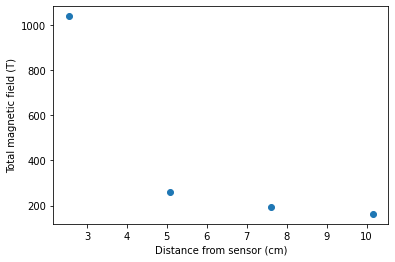

In [ ]:
fig = plt.figure();
ax = fig.add_subplot();
ax.set_xlabel('Distance from sensor (cm)');
ax.set_ylabel('Total magnetic field (T)');
ax.scatter([2.54, 5.08, 7.62, 10.16], means);

Chi Squared: 317121607914.92426


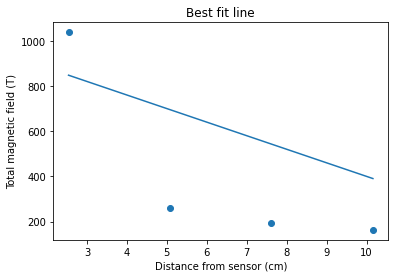

In [ ]:
m = -60;
b = 1000;

def eq_line(m, x, b):
  return (m*x)+b;
pred = [eq_line(m, 2.54, b), eq_line(m, 5.08, b), eq_line(m, 7.62, b), eq_line(m, 10.16, b)];

total = 0;
for i in range(4):
  uncert = np.std(all_data_frames[i]["BT"]) / np.sqrt(len(all_data_frames[i]["BT"]));
  total += ((means[i] - eq_line(m, pred[i], b)) ** 2) / (uncert ** 2);
chi2_line = total / 4;

print('Chi Squared:', chi2_line);
fig = plt.figure();
ax = fig.add_subplot();
ax.set_xlabel('Distance from sensor (cm)');
ax.set_ylabel('Total magnetic field (T)');
ax.set_title('Best fit line');
ax.scatter([2.54, 5.08, 7.62, 10.16], means);
ax.plot([2.54, 5.08, 7.62, 10.16], pred);

In [ ]:
a = 0;
b = 0;
c = 0;

def eq_inverse(a, b, c):
  return (1 / (a * (x ** b))) + c;
pred = [eq_line(m, 2.54, b), eq_line(m, 5.08, b), eq_line(m, 7.62, b), eq_line(m, 10.16, b)];